# EDA Visualizing Data in Databricks

#### by Esaq

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, sum, min, max, count

spark = SparkSession.builder.appName("EDA_Students").getOrCreate()

In [0]:
df = spark.read.option("header", True).option("inferSchema", True).csv("/FileStore/tables/StudentsPerformance.csv")
df.show(5)


+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|
|female|       group C|               some college|    standard|              completed|        69|           90|           88|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|           57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     

In [0]:
df.printSchema()

root
 |-- gender: string (nullable = true)
 |-- race/ethnicity: string (nullable = true)
 |-- parental level of education: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- test preparation course: string (nullable = true)
 |-- math score: integer (nullable = true)
 |-- reading score: integer (nullable = true)
 |-- writing score: integer (nullable = true)



### Gender-wise Student Count

In [0]:
gender_df = df.groupBy("gender") \
              .count() \
              .orderBy("count", ascending=False)

display(gender_df)

gender,count
female,518
male,482


Databricks visualization. Run in Databricks to view.

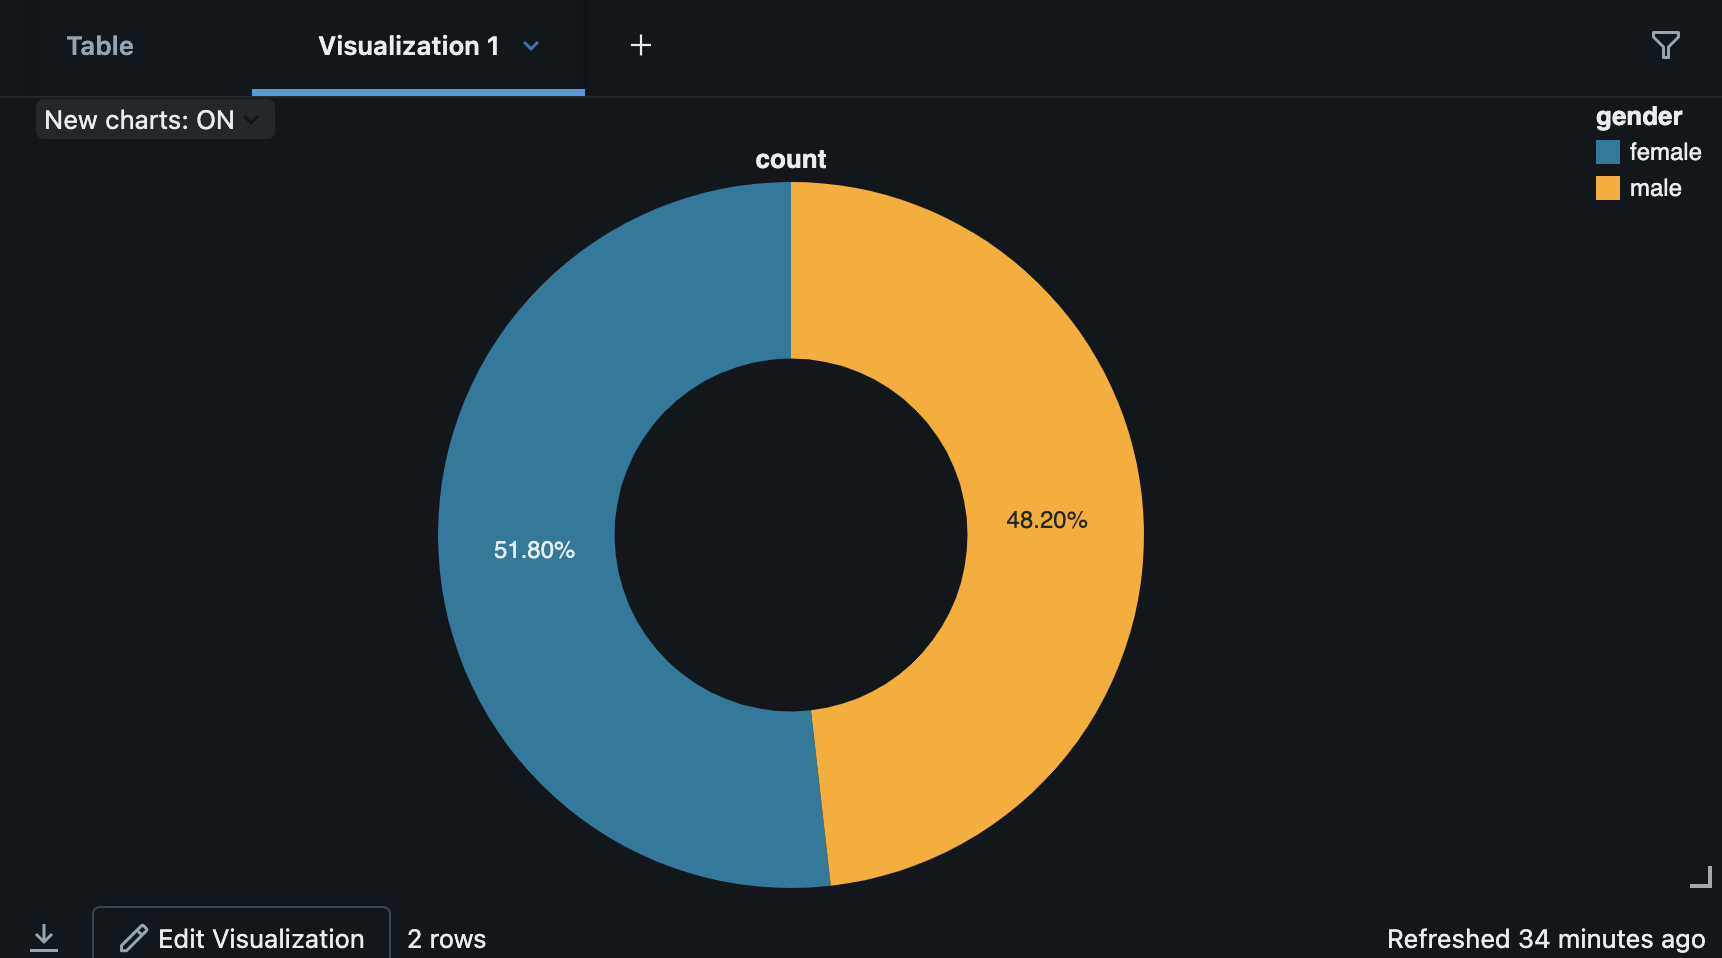

### Average Scores by Gender

In [0]:

avg_scores_gender = df.groupBy("gender") \
    .agg(
        avg("math score").alias("avg_math"),
        avg("reading score").alias("avg_reading"),
        avg("writing score").alias("avg_writing")
    )

display(avg_scores_gender)


gender,avg_math,avg_reading,avg_writing
female,63.633204633204635,72.60810810810811,72.46718146718146
male,68.72821576763485,65.47302904564316,63.31120331950208


Databricks visualization. Run in Databricks to view.

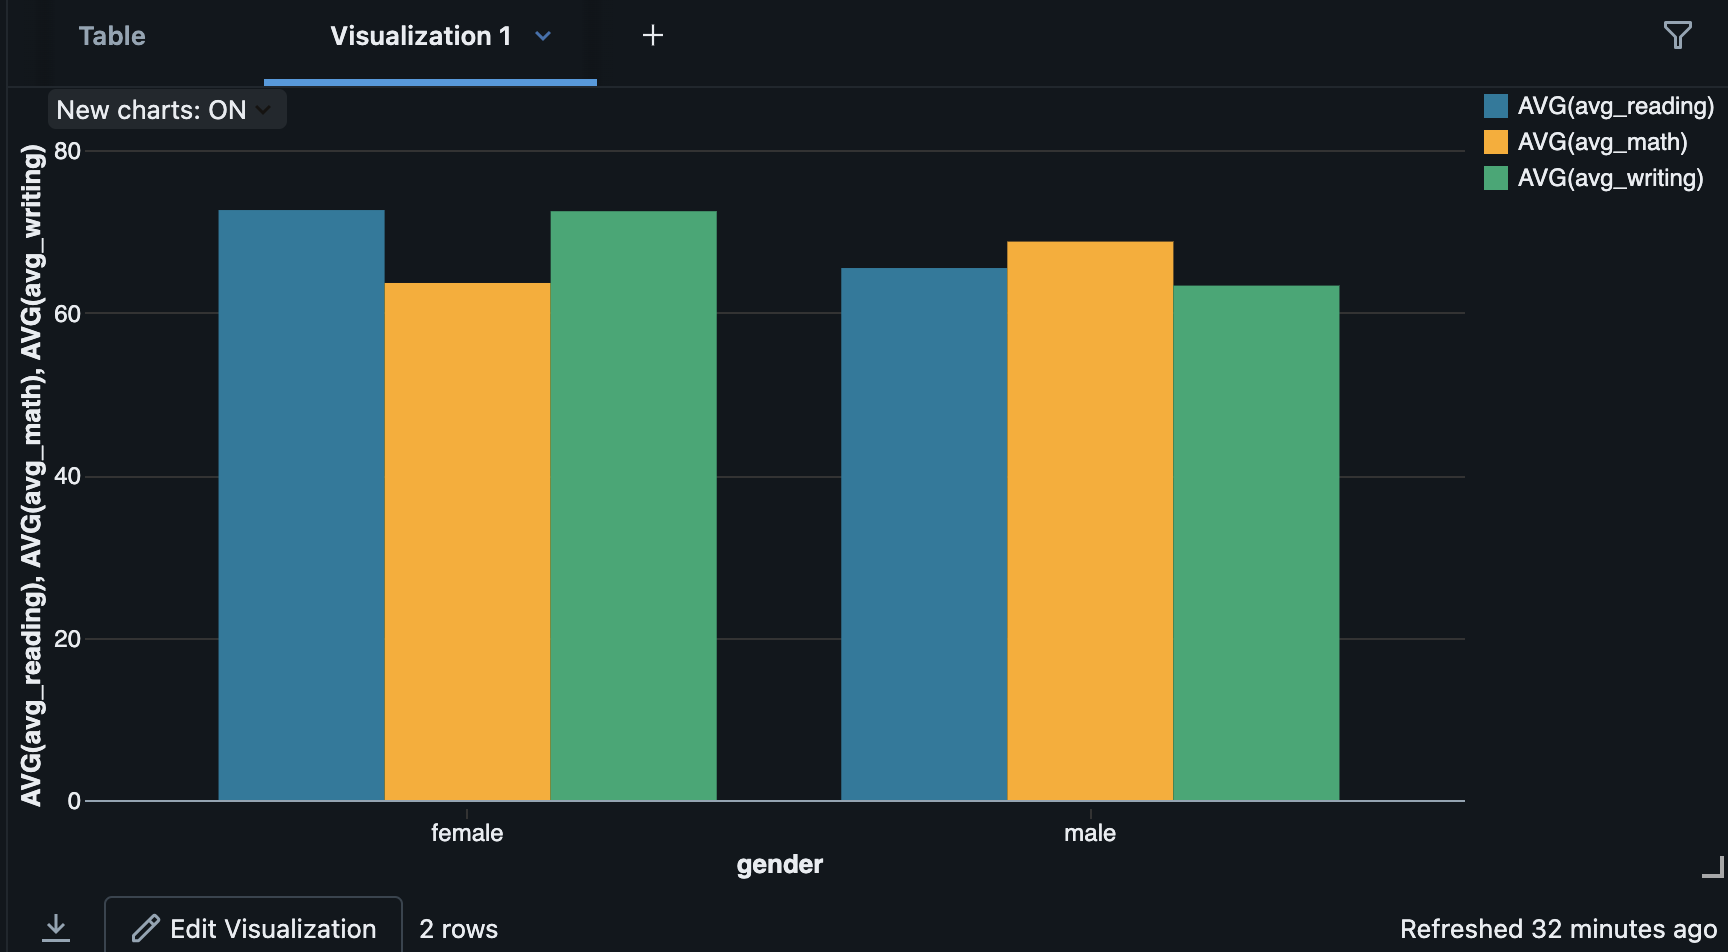

### Distribution of Math Scores

In [0]:
math_scores = df.select("math score")
display(math_scores)

math score
72
69
90
47
76
71
88
40
64
38


Databricks visualization. Run in Databricks to view.

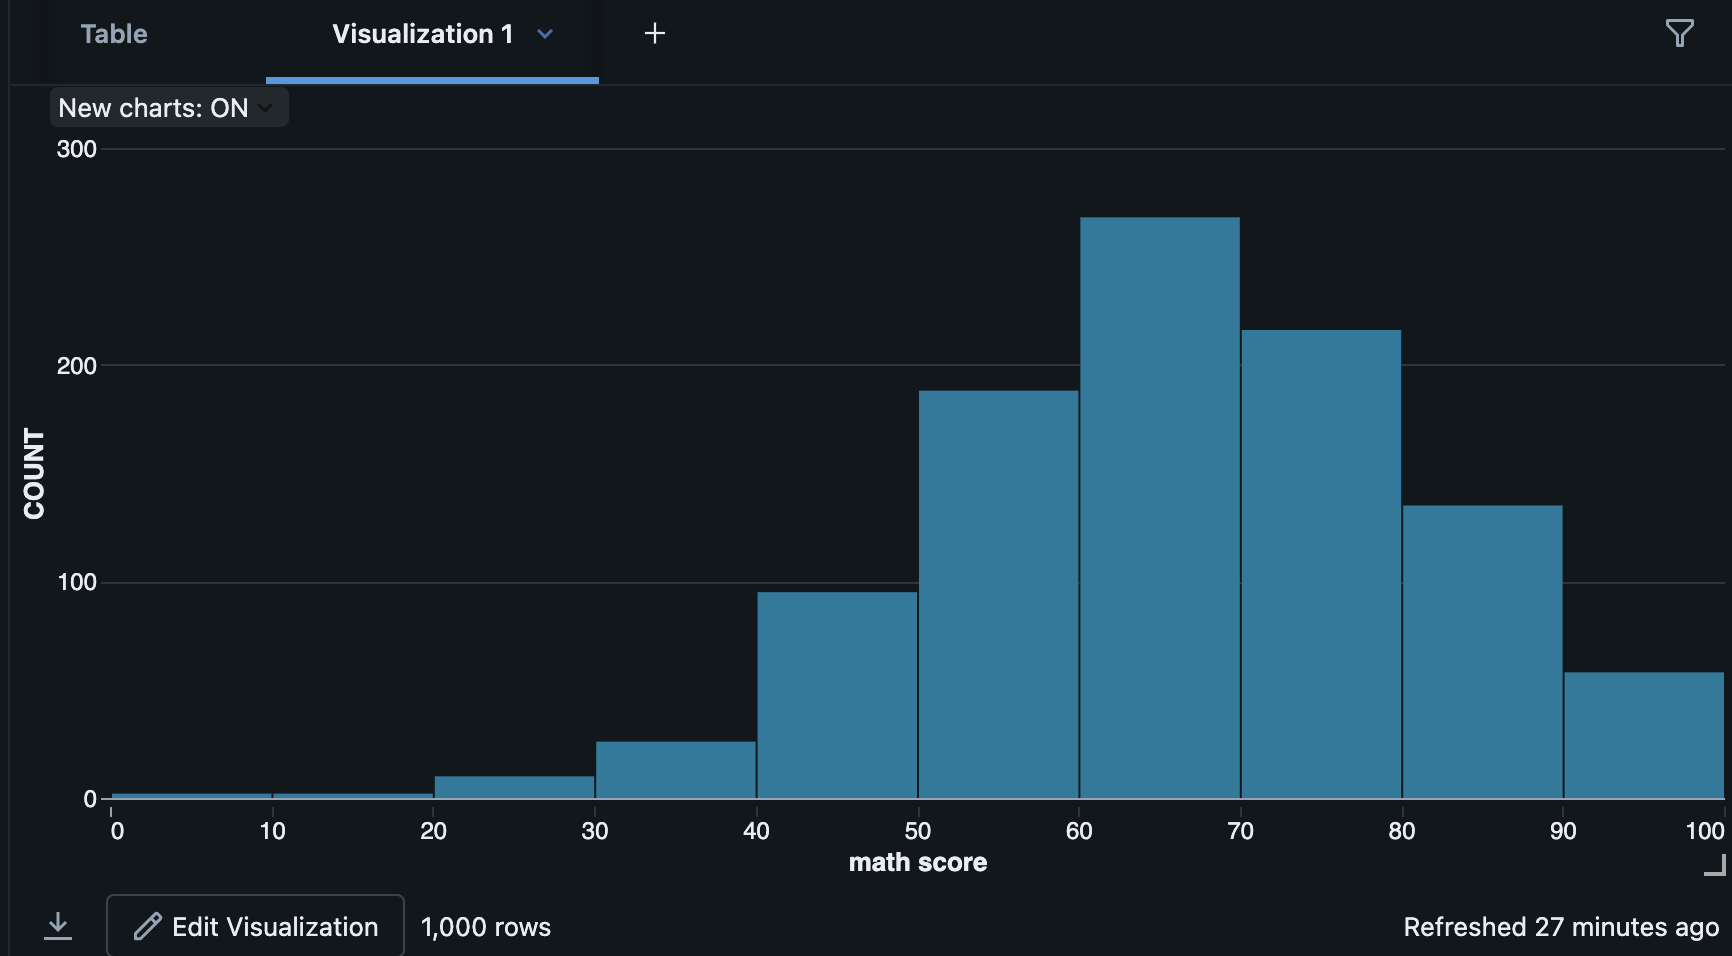

### Writing Score by Parental Education

In [0]:
box_df = df.select("parental level of education", "writing score")
display(box_df)


parental level of education,writing score
bachelor's degree,74
some college,88
master's degree,93
associate's degree,44
some college,75
associate's degree,78
some college,92
some college,39
high school,67
high school,50


Databricks visualization. Run in Databricks to view.

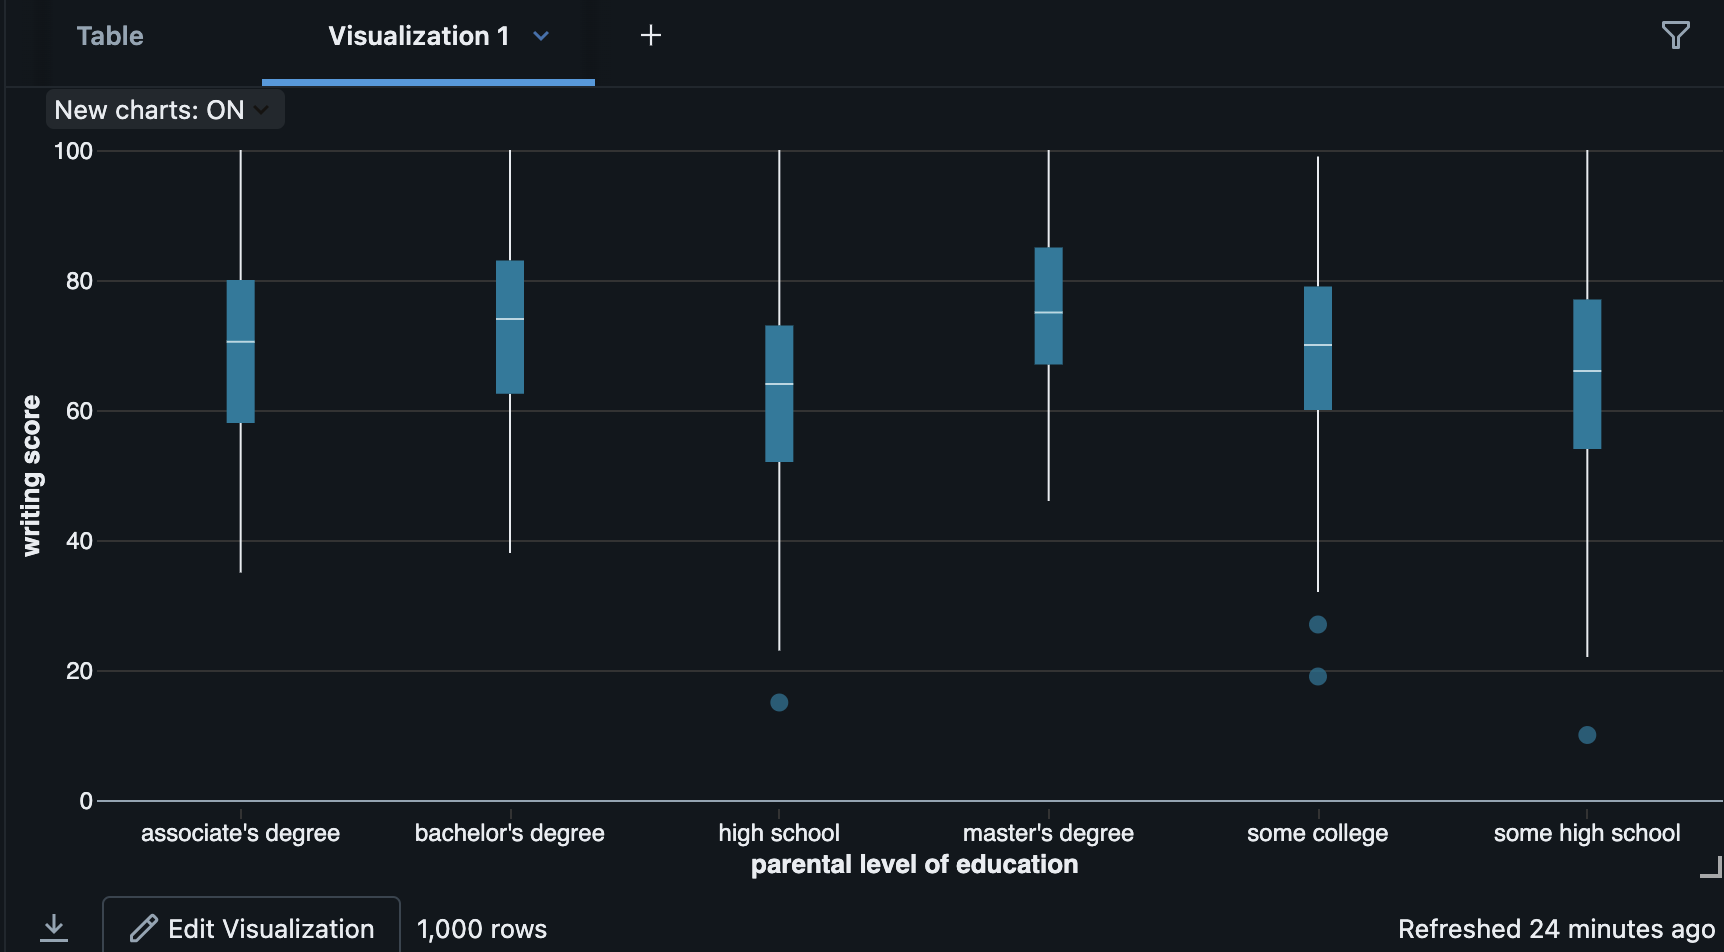

### Math Score vs Reading Score

In [0]:
scatter_df = df.select("math score", "reading score")
display(scatter_df)

math score,reading score
72,72
69,90
90,95
47,57
76,78
71,83
88,95
40,43
64,64
38,60


Databricks visualization. Run in Databricks to view.

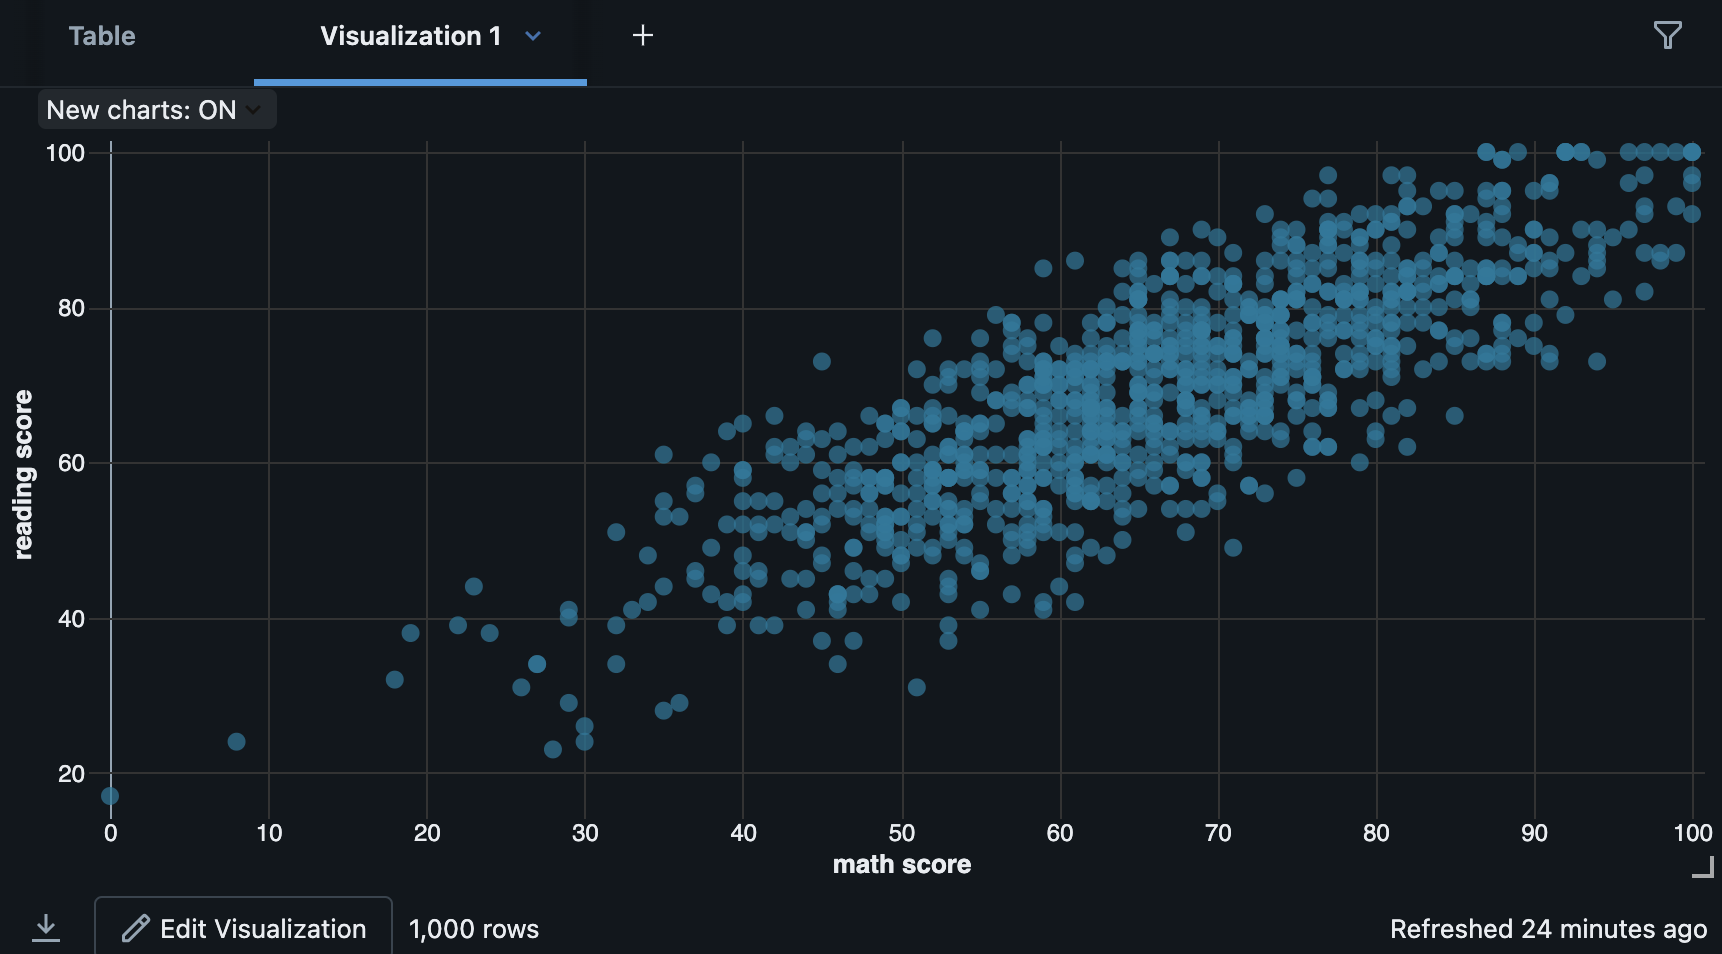

### Average Math Score by Race/Ethnicity

In [0]:
race_math = df.groupBy("race/ethnicity") \
              .agg(avg("math score").alias("avg_math")) \
              .orderBy("race/ethnicity")

display(race_math)

race/ethnicity,avg_math
group A,61.62921348314607
group B,63.45263157894737
group C,64.46394984326018
group D,67.36259541984732
group E,73.82142857142857


Databricks visualization. Run in Databricks to view.

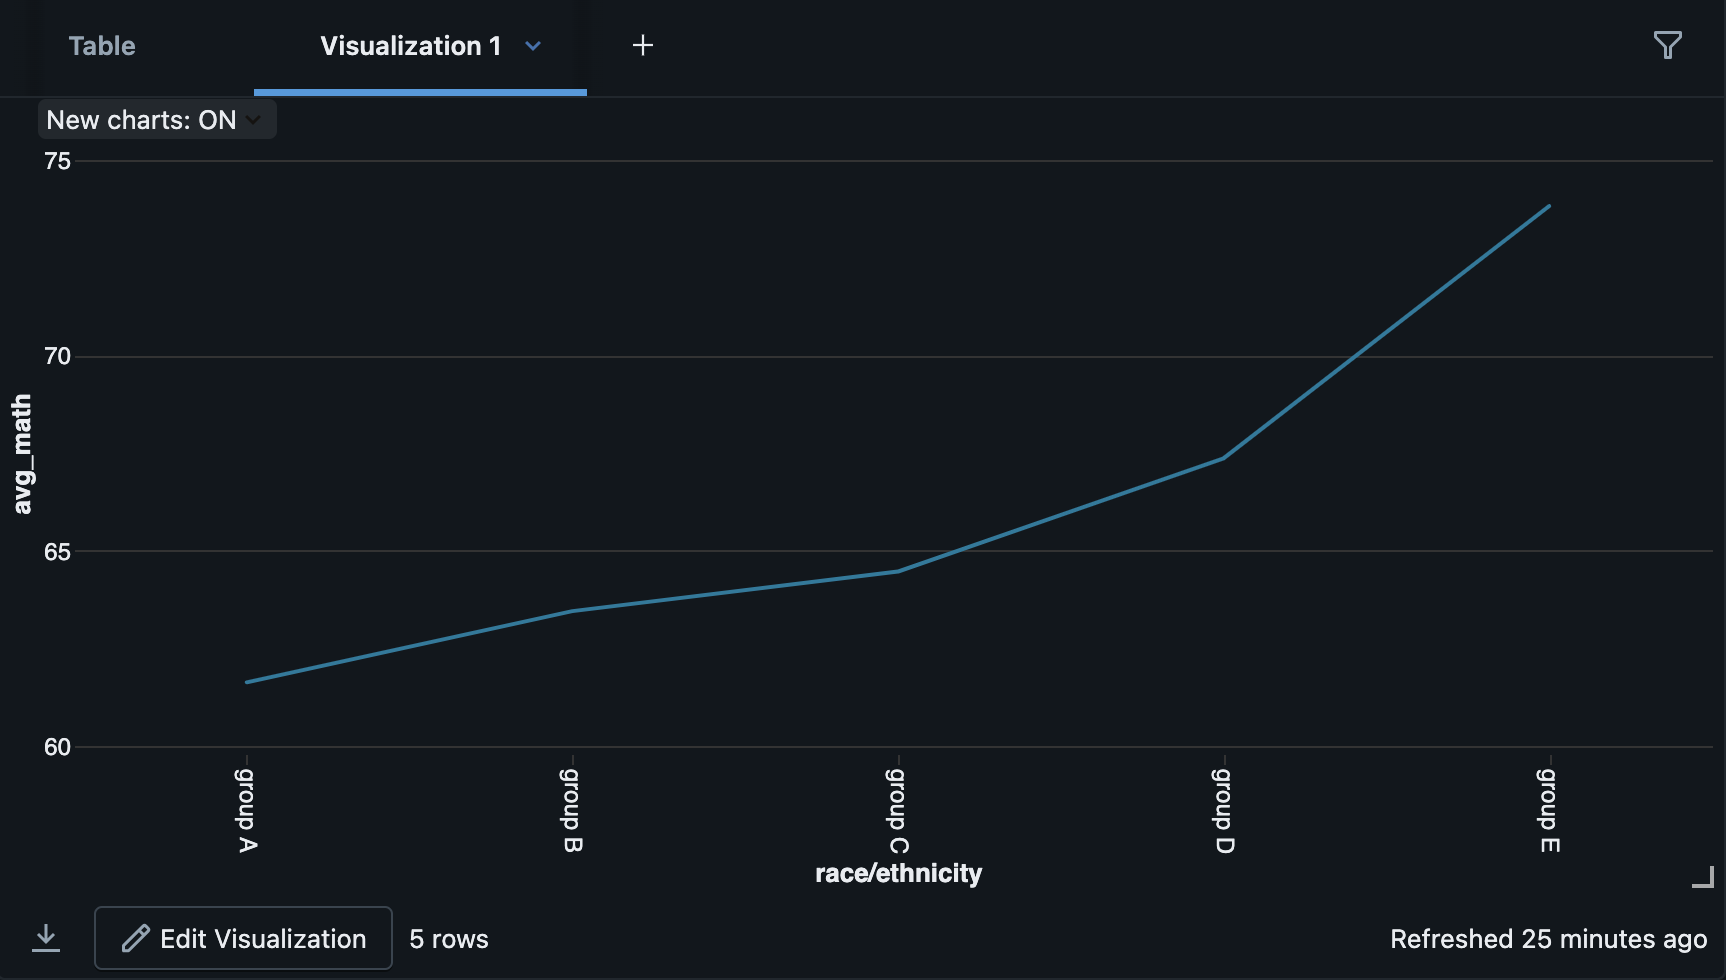

### Correlation Between Scores

In [0]:
scores_df = df.select("math score", "reading score", "writing score")

scores_pd = scores_df.toPandas()

import pandas as pd
corr_df = pd.DataFrame(scores_pd.corr())

spark_corr_df = spark.createDataFrame(corr_df.stack().reset_index())
spark_corr_df = spark_corr_df.withColumnRenamed("level_0", "score1") \
                             .withColumnRenamed("level_1", "score2") \
                             .withColumnRenamed("0", "correlation")

display(spark_corr_df)


score1,score2,correlation
math score,math score,1.0
math score,reading score,0.8175796636720539
math score,writing score,0.8026420459498075
reading score,math score,0.8175796636720539
reading score,reading score,1.0
reading score,writing score,0.9545980771462476
writing score,math score,0.8026420459498075
writing score,reading score,0.9545980771462476
writing score,writing score,1.0


Databricks visualization. Run in Databricks to view.

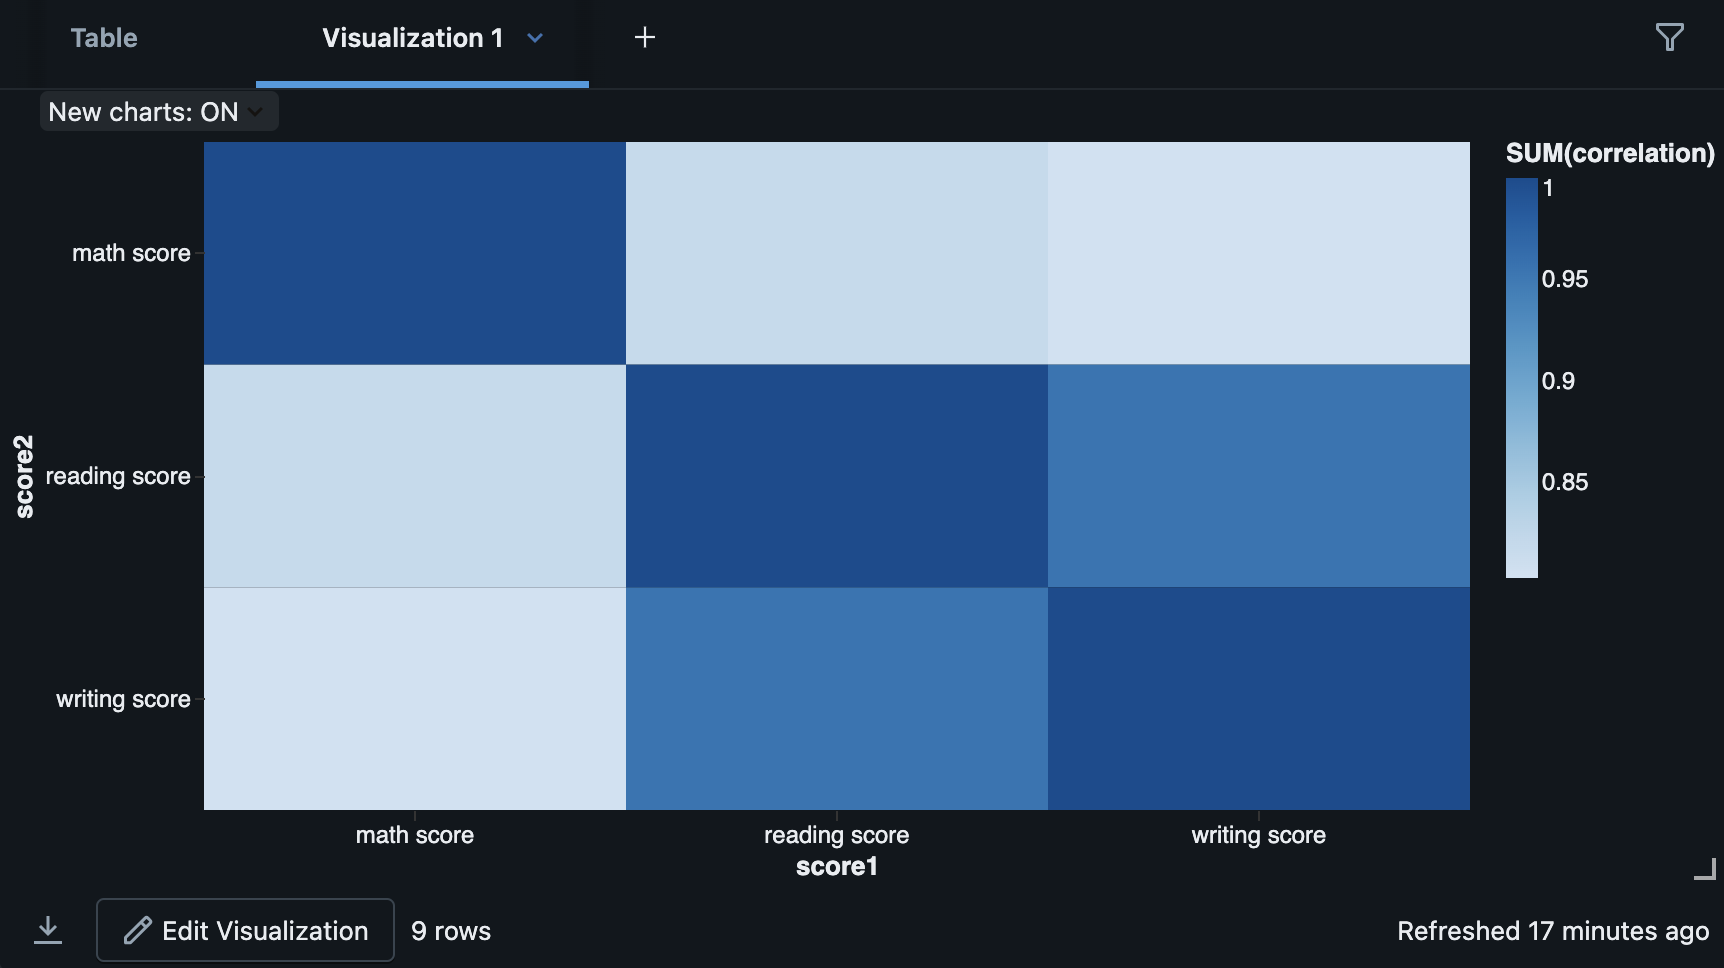